<a href="https://colab.research.google.com/github/swapnalishamrao/Unsupervised_ML_Clustering_Project/blob/main/Netflix_Movies_and_Tv_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font size='8px'><font color='blue'>**<u>Netflix Movies and Tv Shows Clustering<u>**  

#### **Project Type**  - Unsupervised ML
#### **Contribution**  - Individual
#### **Name**          - Swapnali Shamrao Mane

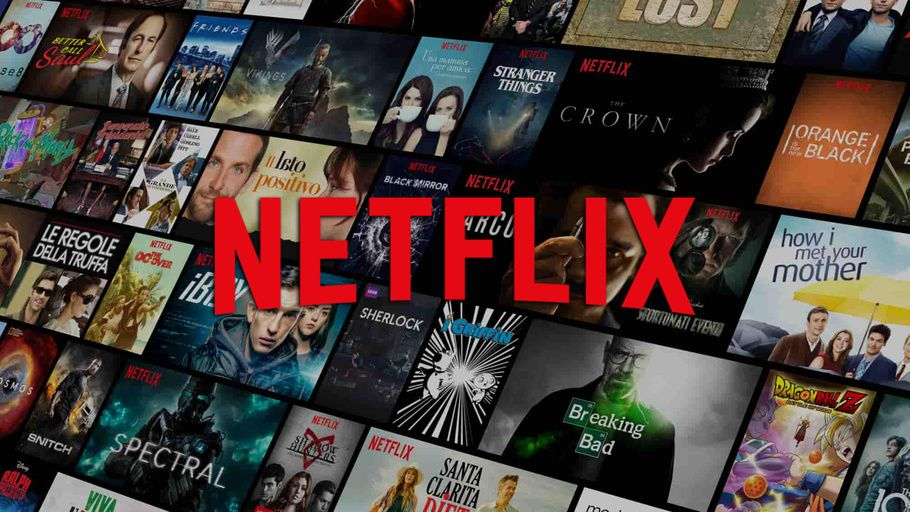

### <font size='5px'><font color='#grey'>**<u>Project Summary:-<u>**

**1.Project Objective**: The project aimed to group similar movies and TV shows on Netflix into clusters based on their content.

**2.Data Source**: Data was collected from a third-party Netflix search engine, providing details on over 7,000 Netflix titles.

**3.Data Description**: The dataset included information such as title, director, cast, country, date added, rating, and release year. Some data fields had missing values, which were addressed.

**4.Data Preprocessing**: Missing values were filled with placeholders like "Unavailable." The "date_added" feature was converted to datetime, and additional date-related features were created. Outliers in the "release year" were handled using the interquartile range.

**5.Data Analysis and Insights**:

* Netflix had more movies (69.14%) than TV shows (30.86%).
* Majority of movies were released between 2015 and 2020, while TV shows peaked between 2018 and 2020.
* 2017 was a significant year for movie releases, and 2020 for TV shows.
* Netflix shifted focus to releasing more TV shows than movies in 2020.
* Peak content additions occurred in 2019, with regular additions throughout the year.
* Most common content rating was TV-MA, followed by TV-14.
* The United States produced most movies on Netflix, with India in second place.
* The United States and the United Kingdom dominated TV show production.
* Raul Campos and Jan Suter directed many Netflix movies, while Alastair Fothergill was prominent in TV shows.
* International movies and dramas were popular content on Netflix.
* Common actors in Netflix content included Lee, Michel, David, Jhon, and James.
* Some correlations were observed between release year and day added, indicating Netflix's growth.

**6.Text Data Processing**: Text data from the description was cleaned by removing punctuation, stopwords, and digits. It was then converted into a TF-IDF matrix for clustering.

**7.Clustering Models**:

* Various clustering algorithms, including K-Means, Hierarchical, and DBSCAN, were applied.
* Out of all the methods we tried, the K-Means clustering model was the best at this job. It had a high score, which means it did a good job at putting similar things together.
* K-Means clustering performed the best with high Calinski-Harabasz and silhouette scores.

**8.Challenges Faced**:

Identifying the optimal number of clusters was challenging.
Methods like the Kelbow method and silhouette score took time to provide results.

**9.Project Outcome**: The project successfully organized Netflix movies and TV shows into clusters, making it easier for users to find content that suits their preferences.

**10.Conclusion**: Despite challenges, the project achieved its goal of clustering Netflix content effectively, enhancing the user experience on the platform.

### <font size='5px'><font color='grey'>**GitHub Link:-**

https://github.com/swapnalishamrao/Unsupervised_ML_Clustering_Project

## <font size='5px'><font color='deeppink'>**Problem Statement**

"We need to understand what types of TV shows and movies are available on Netflix and if there has been a shift towards more TV shows than movies in recent years. We also want to group similar content together for better user recommendations."

# <font size='5px'><font color='cgrey'>***Let's Begin !***

 <font size='5px'><font color='green'>**Importing Library and connecting drive**

In [1]:
# Import Libraries
# Important modules
import pandas as pd
import numpy as np

#visulizaiton modules
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.cm as cm
import geopandas as gpd
!pip install country_converter --upgrade
import country_converter as coco
import plotly.express as px

#import string module
import string
string.punctuation

# Importing libraries for hypothesis testing
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f
from scipy.stats import ttest_ind
from scipy import stats

#nlp module
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import TweetTokenizer
from sklearn.metrics.pairwise import cosine_similarity

#import fundamental models
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from yellowbrick.cluster import SilhouetteVisualizer

#import warnings
import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 963.2 kB/s eta 0:00:00


### <font size='5px'><font color='purple'>**Dataset Loading**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load Dataset
df=pd.read_csv(r"/content/drive/MyDrive/Unsupervised_ML_Project/NETFLIX MOVIES AND TV SHOWS CLUSTERING (1).csv")

###<font size='5px'><font color='blue'>**Dataset First View**

In [4]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


###  <font size='5px'><font color='baby'>**<u>Data Inispection</u>**

In [8]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

Dataset having 7787 observations and 12 columns.

### <font size='5px'><font color='winered'>**Dataset Information**

In [7]:
#Information of dataset columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


1.In the dataset, there are object,  and int64 dtypes features present.

2.Dataset is having numerical and categorical data.

3.Mixed data(Numerical+Categorical)

4.There are 12 features

#### <font size='5px'><font color='#cwinered'>**Checking Duplicate Values**

In [9]:
# Checking duplicated values in dataset
count_duplicated = df.duplicated().sum()
print(f'Dataset having {count_duplicated} duplicated values')

Dataset having 0 duplicated values


We found that there were no duplicate entries in the above data.

#### <font size='5px'><font color='fkep'>**Checking Missing Values/Null Values**

In [10]:
# Checking for number of null values
count_null_df=df.isnull().sum()
count_null_df

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [11]:
# Missing Values Percentage
percentage_null_value = round(df.isna().sum()/len(df)*100, 2)

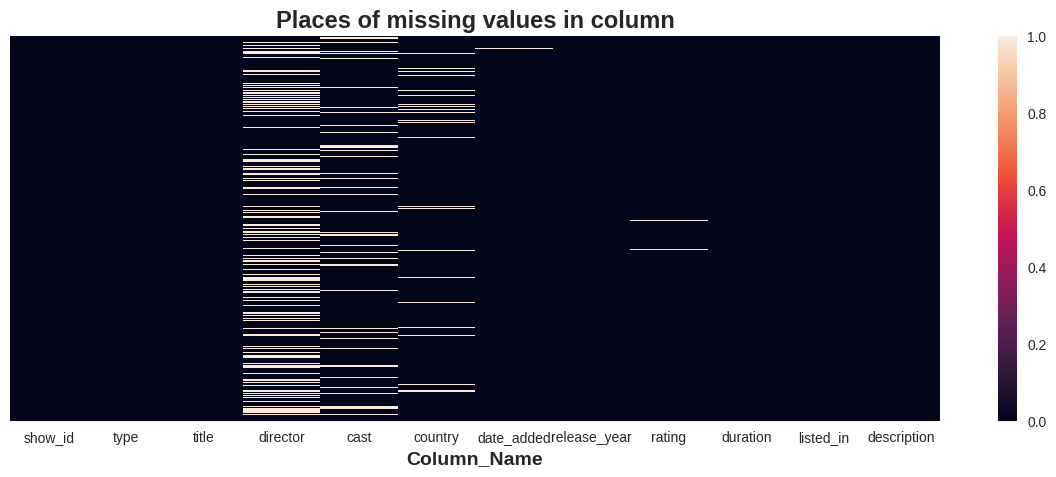

In [12]:
# No missing Values in our dataset
plt.figure(figsize=(15, 5))
sns.heatmap(df.isnull(), cbar=True, yticklabels=False)
plt.xlabel("Column_Name", size=14, weight="bold")
plt.title("Places of missing values in column",fontweight="bold",size=17)
plt.show()

<Axes: >

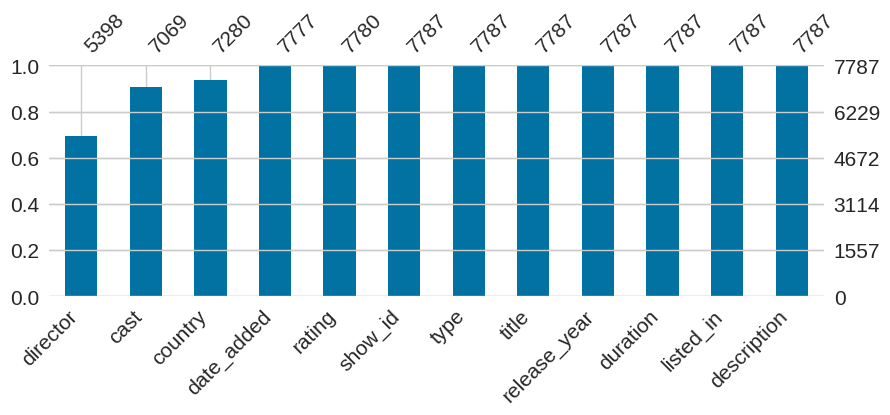

In [13]:
# Visualizing the missing values
import missingno as msno
msno.bar(df, color='b',sort='ascending', figsize=(10,3), fontsize=15)

### What did you know about your dataset?

- There are 7787 rows and 12 columns in the dataset.
- In the director, cast, country, date_added, and rating columns, there are missing values.
- The dataset does not contain any duplicate values.

- Every row of information we have relates to a specific movie. Therefore, we are unable to use any method to impute any null values.
- Additionally, due to the small size of the data, we do not want to lose any data, so after analyzing each column, we simply impute numeric values using an empty string in the following procedure.

## <font size='5px'><font color='doio'>***Understanding Your Variables***

In [14]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [15]:
# Dataset Describe
# Bsic description of Dataset
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


### <font size='5px'><font color='rdieadfd'>**Variables Description**

####**Data Description**
- show_id : Unique ID for every Movie/Show

- type : Identifier - Movie/Show

- title : Title of the Movie/Show

- director : Director of the Movie/Show

- cast : Actors involved in the Movie/Show

- country : Country where the Movie/Show was produced

- date_added : Date it was added on Netflix

- release_year : Actual Release year of the Movie/Show

- rating : TV Rating of the Movie/Show

- duration : Total Duration - in minutes or number of seasons

- listed_in : Genre

- description : The Summary description

In [16]:
# Finding categorical variables
categorical_variables = [var for var in df.columns if df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical_variables)))
print('--'*45)
print(categorical_variables)

There are 11 categorical variables
------------------------------------------------------------------------------------------
['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description']


In [17]:
for col in df.select_dtypes(include='object').columns:
  print(col)
  print(df[col].unique())
  print('--'*45)

show_id
['s1' 's2' 's3' ... 's7785' 's7786' 's7787']
------------------------------------------------------------------------------------------
type
['TV Show' 'Movie']
------------------------------------------------------------------------------------------
title
['3%' '7:19' '23:59' ... 'Zulu Man in Japan' "Zumbo's Just Desserts"
 "ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS"]
------------------------------------------------------------------------------------------
director
[nan 'Jorge Michel Grau' 'Gilbert Chan' ... 'Josef Fares' 'Mozez Singh'
 'Sam Dunn']
------------------------------------------------------------------------------------------
cast
['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi'
 'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato'
 'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai,

- 'show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'rating', 'duration', 'listed_in', 'description' among the 1 categorical variables in this dataset.
- There are 1 numerical variables in this dataset:'release_year'

### <font size='5px'><font color='deeppink'>**Check Unique Values for each variable.**

In [18]:
# Checking unique values from each variable
for i in df.columns.tolist():
  print("No. of unique values in", i ,"is", df[i].nunique())
  print('--'*50)

No. of unique values in show_id is 7787
----------------------------------------------------------------------------------------------------
No. of unique values in type is 2
----------------------------------------------------------------------------------------------------
No. of unique values in title is 7787
----------------------------------------------------------------------------------------------------
No. of unique values in director is 4049
----------------------------------------------------------------------------------------------------
No. of unique values in cast is 6831
----------------------------------------------------------------------------------------------------
No. of unique values in country is 681
----------------------------------------------------------------------------------------------------
No. of unique values in date_added is 1565
----------------------------------------------------------------------------------------------------
No. of unique values 

* We are focusing on several key columns of our dataset, including 'type', 'title', 'director', 'cast', 'country', 'rating', 'listed_in', and 'description', as they contain a wealth of information.
* By utilizing these features, we plan to create a cluster column and implement both K-means and Hierarchical clustering algorithms.
* Additionally, we will be developing a content-based recommendation system that utilizes the information from these columns to provide personalized suggestions to users. This approach will allow us to gain valuable insights and group similar data points together, as well as provide personalized recommendations based on user preferences and viewing history.

# <font size='5px'><font color='paintgreen'>**Exploratory Data Analysis(EDA):-**

### **Content**

In [ ]:
#Value count for content column
counts = df.type.value_counts()
percs = df.type.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,Movie,TV Show
count,5377.00000,2410.00000
percentage,0.69051,0.30949


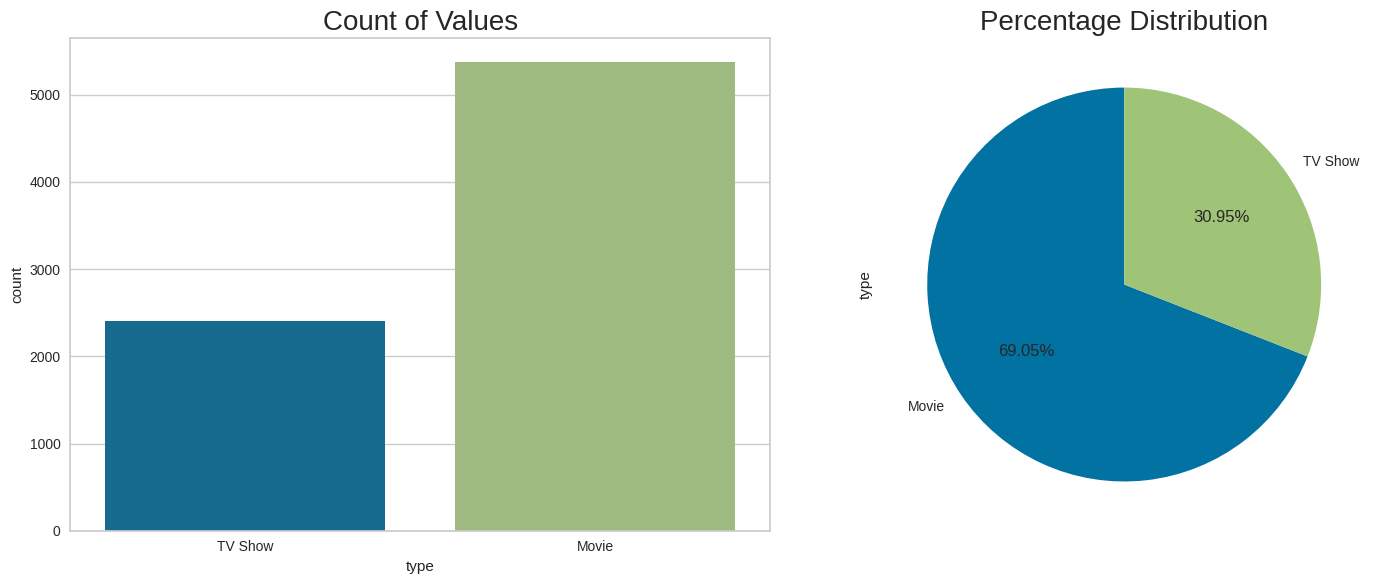

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# countplot
graph = sns.countplot(x='type', data = df, ax=ax[0])
graph.set_title('Count of Values', size=20)

# piechart
df['type'].value_counts().plot(kind='pie', autopct='%1.2f%%', ax=ax[1], figsize=(15,6),startangle=90)
plt.title('Percentage Distribution', size=20)

plt.tight_layout()
plt.show()

* Movies has more number of counts than TV Shows.
* 31% of the data are from TV shows, while 69% of the data are from movies.

### **Ratings**

In [ ]:
# number of unique values
df.rating.nunique()

14

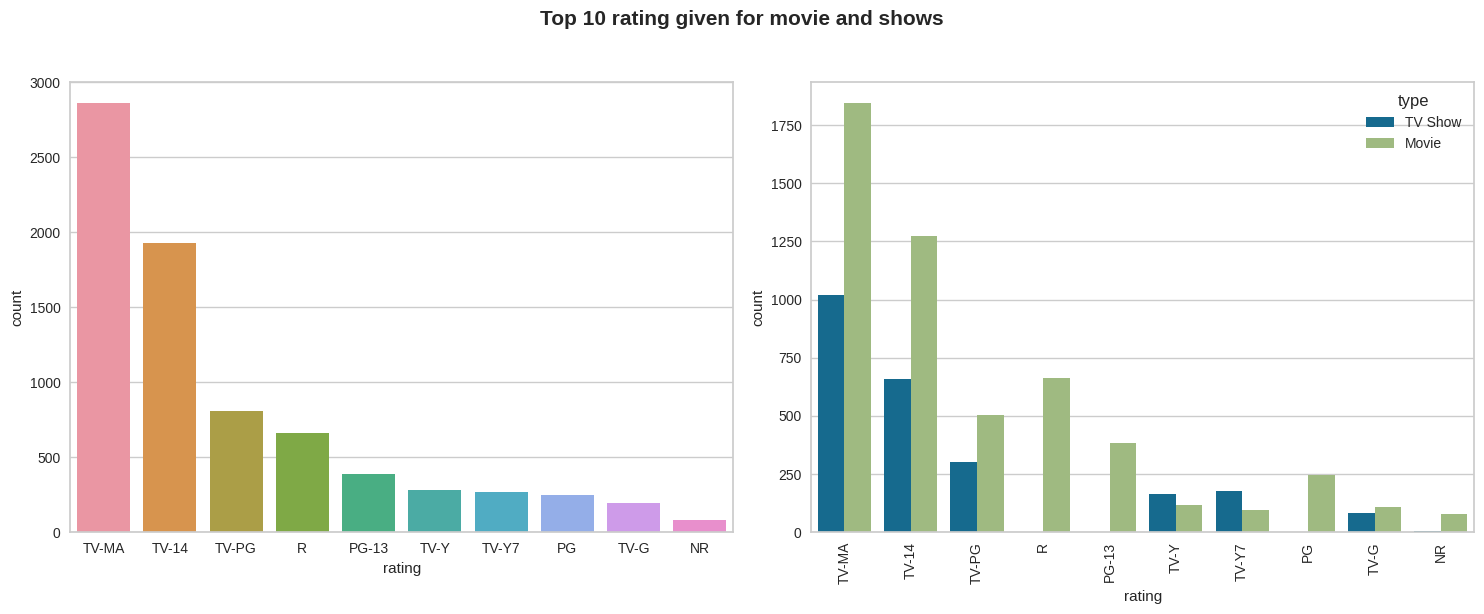

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))
plt.suptitle('Top 10 rating given for movie and shows', weight='bold', y=1.02, size=15)

# univariate analysis
sns.countplot(x="rating", data=df, order=df['rating'].value_counts().index[0:10], ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="rating", data=df, hue='type', order=df['rating'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
#Value count for rating column
counts = df.rating.value_counts()
percs = df.rating.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,TV-MA,TV-14,TV-PG,R,PG-13,TV-Y,TV-Y7,PG,TV-G,NR,G,TV-Y7-FV,UR,NC-17
count,2863.000000,1931.000000,806.000000,665.000000,386.000000,280.00000,271.000000,247.000000,194.000000,84.000000,39.000000,6.000000,5.000000,3.000000
percentage,0.367995,0.248201,0.103599,0.085476,0.049614,0.03599,0.034833,0.031748,0.024936,0.010797,0.005013,0.000771,0.000643,0.000386


In [ ]:
#creating two extra column
tv_shows=df[df['type']=='TV Show']
movies=df[df['type']=='Movie']

In [ ]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_ages'] = df['rating'].replace(ratings)

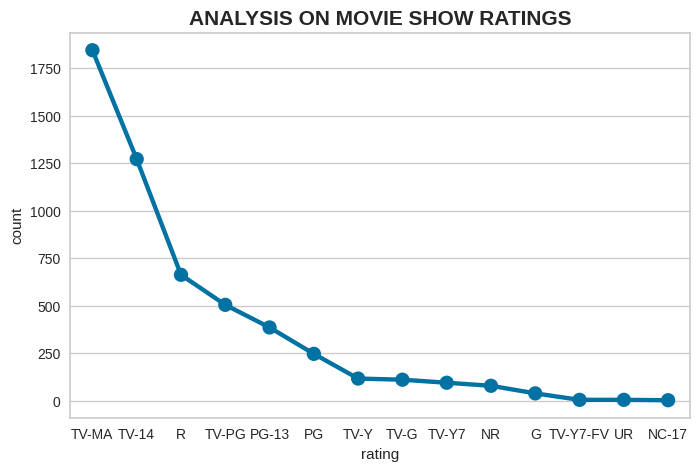

In [ ]:
#Analysis on rating based on overall movie show rating system
movies_ratings = movies.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=movies_ratings)
plt.title('ANALYSIS ON MOVIE SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

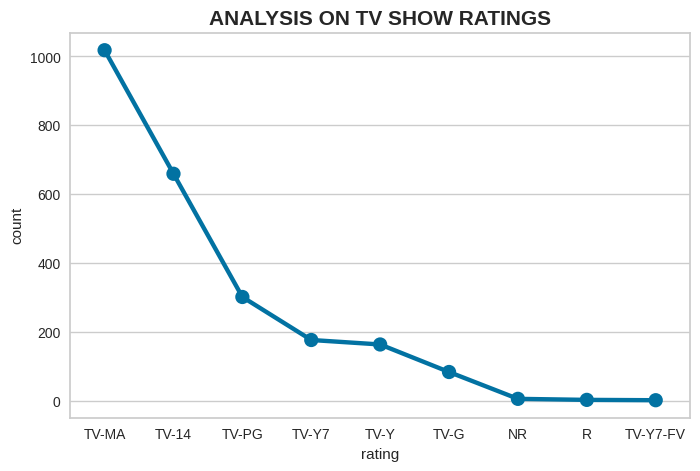

In [ ]:
#Analysis rating based on overall tv show rating system
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (8,5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('ANALYSIS ON TV SHOW RATINGS', fontsize=15, fontweight='bold')
plt.show()

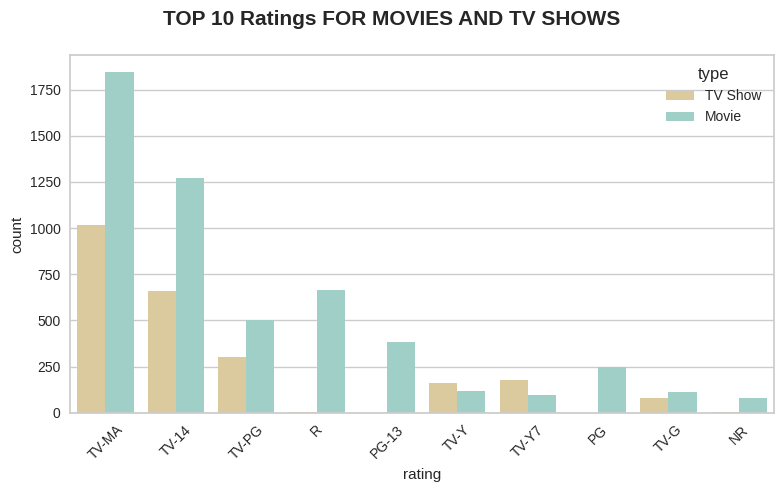

In [ ]:
#Ananlysis top 10 Ratings Show
plt.figure(figsize=(8,5))
plt.suptitle('TOP 10 Ratings FOR MOVIES AND TV SHOWS',fontsize=15, fontweight='bold')
graph = sns.countplot(x="rating", data=df, hue='type',palette="BrBG", order=df['rating'].value_counts().index[0:10])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* The majority of Movies and TV shows have a rating of TV-MA, which stands for "Mature Audience," followed by TV-14, which stands for "Younger Audience."
* When compared to TV shows, Movies receive the highest rating, which is pretty obvious given that a number of Movies are higher compared to TV shows, as we saw earlier in the type column.

## **title**

In [ ]:
# Word Cloud library
from wordcloud import WordCloud, STOPWORDS

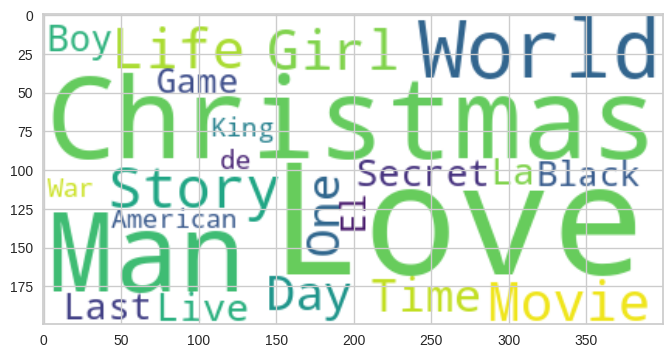

In [ ]:
# text documents
text = " ".join(word for word in df['title'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

Words like 'Love', 'Christmas', 'Man', 'World', 'Life', 'Girl', and 'Story' are frequently used in the movie title column.

### **description**

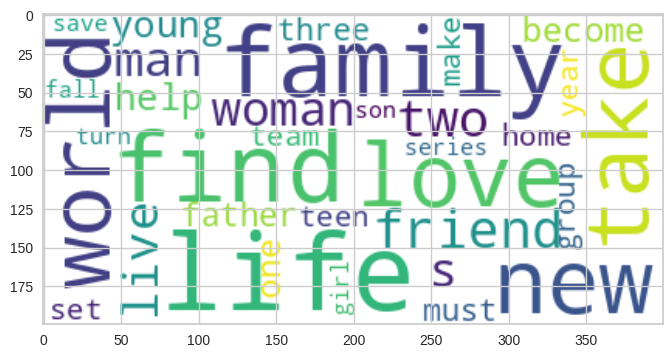

In [ ]:
# text documents
text = " ".join(word for word in df['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

The most frequently used words in the description column are "family," "find," "life," "love," "new world," and "friend."

In [ ]:
# number of unique values
df['country'].nunique()

681

In [ ]:
#Value count for country column
counts = df.country.value_counts()
percs = df.country.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,United States,India,United Kingdom,Japan,South Korea,Canada,Spain,France,Egypt,Turkey,...,"United States, South Korea, Japan","Lebanon, United Arab Emirates, France, Switzerland, Germany","France, Australia, Germany","Ireland, United States","United States, Canada, Germany","Russia, United States, China","Italy, Switzerland, France, Germany","United States, United Kingdom, Canada","United States, United Kingdom, Japan","Sweden, Czech Republic, United Kingdom, Denmark, Netherlands"
count,2555.000000,923.000000,397.000000,226.000000,183.000000,177.000000,134.000000,115.000000,101.000000,100.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.350962,0.126786,0.054533,0.031044,0.025137,0.024313,0.018407,0.015797,0.013874,0.013736,...,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137,0.000137


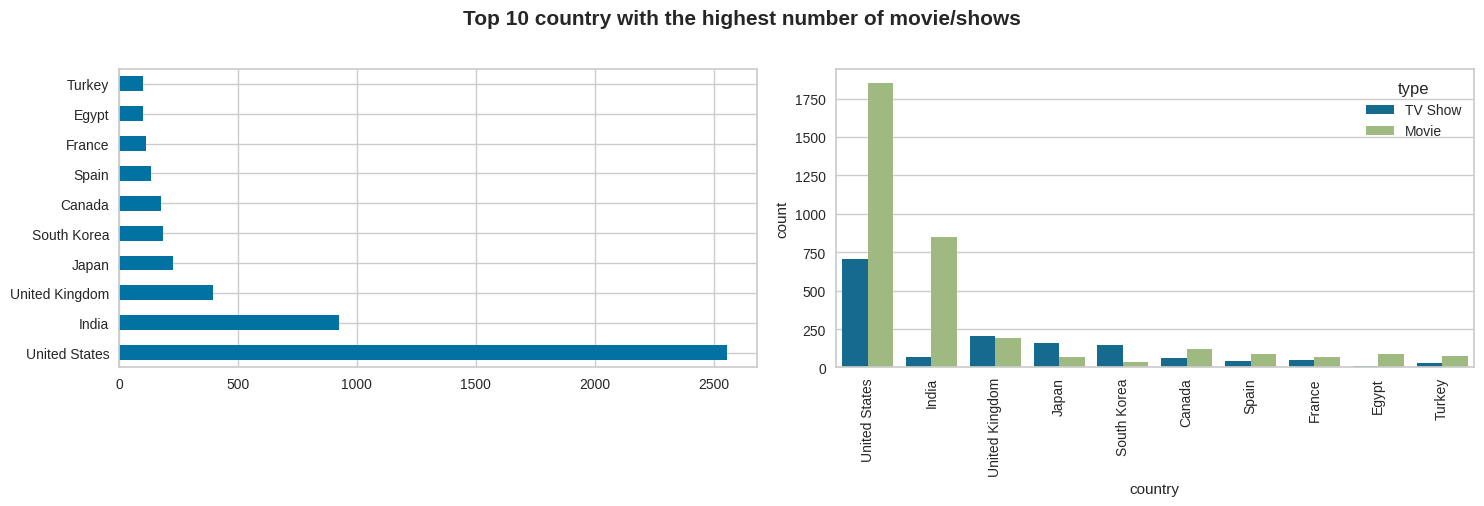

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
plt.suptitle('Top 10 country with the highest number of movie/shows', weight='bold', size=15, y=1.01)

# univariate analysis
df['country'].value_counts().nlargest(10).plot(kind='barh', ax=ax[0])

# bivariate analysis
graph = sns.countplot(x="country", data=df, hue='type',order=df['country'].value_counts().index[0:10], ax=ax[1])
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

* The United States-based movies and TV shows were produced most, followed by India and the United Kingdom.
* In India and United State, a greater number of movies are present compared to TV shows.
* In the UK, Japan, and South Korea there are a greater number of TV shows than movies.

### **Release year**

In [ ]:
# number of unique values
df['release_year'].nunique()

73

In [ ]:
print(f'Oldest release year : {df.release_year.min()}')
print(f'Latest release year : {df.release_year.max()}')

Oldest release year : 1925
Latest release year : 2021


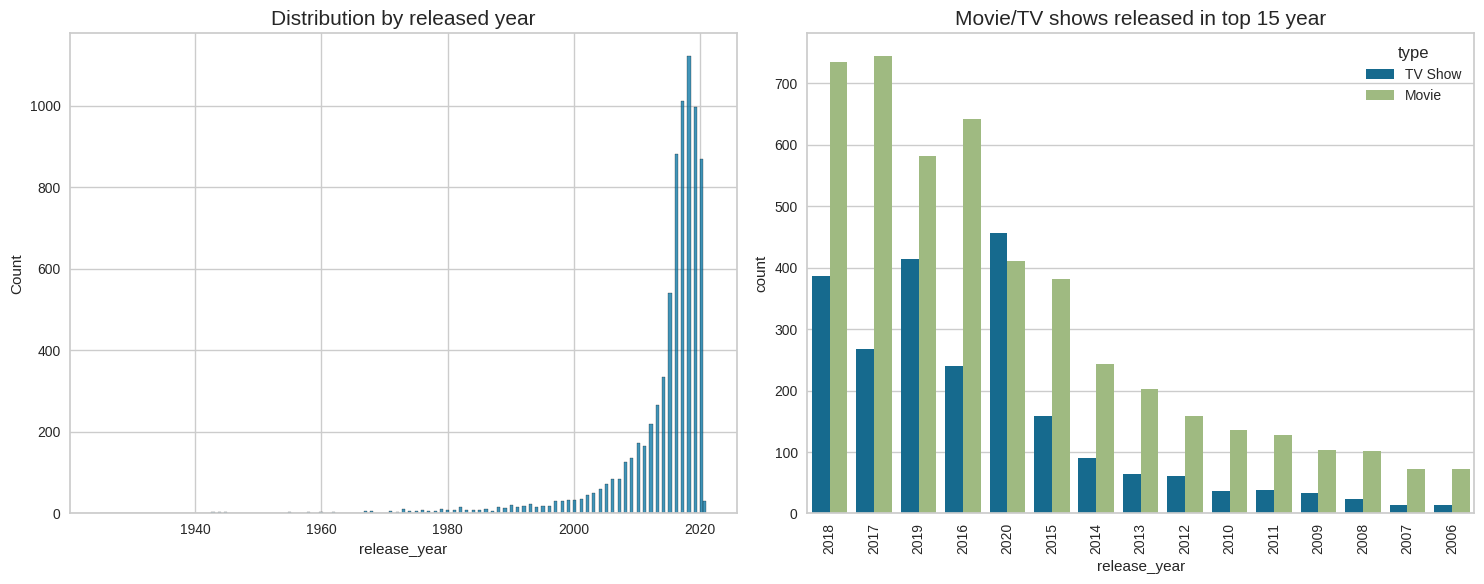

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Univariate analysis
hist = sns.histplot(df['release_year'], ax=ax[0])
hist.set_title('Distribution by released year', size=15)

# Bivariate analysis
count = sns.countplot(x="release_year", hue='type', data=df, order=df['release_year'].value_counts().index[0:15], ax=ax[1])
count.set_title('Movie/TV shows released in top 15 year', size=15)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [ ]:
#Value count for year column
counts = df.release_year.value_counts()
percs = df.release_year.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,2018,2017,2019,2016,2020,2015,2014,2013,2012,2010,...,1969,1963,1954,1970,1956,1925,1964,1966,1947,1959
count,1121.000000,1012.00000,996.000000,882.000000,868.000000,541.000000,334.000000,267.000000,219.000000,173.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.143958,0.12996,0.127905,0.113266,0.111468,0.069475,0.042892,0.034288,0.028124,0.022217,...,0.000257,0.000257,0.000257,0.000257,0.000257,0.000128,0.000128,0.000128,0.000128,0.000128


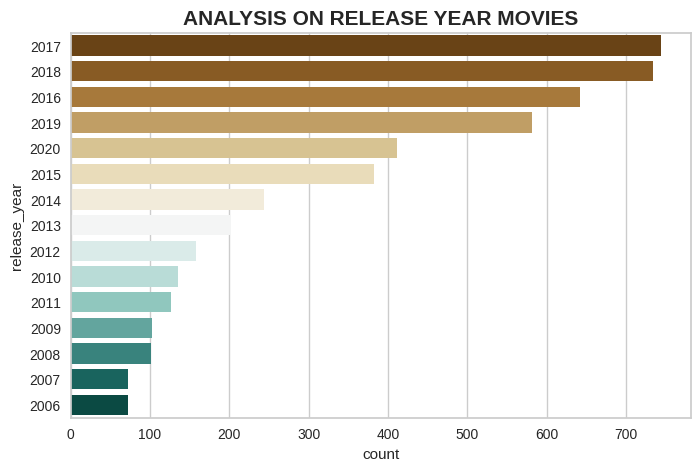

In [ ]:
#Analysis on release year of movie show
plt.figure(figsize=(8,5))
sns.countplot(y="release_year", data=movies, palette="BrBG", order=movies['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR MOVIES', fontsize=15, fontweight='bold')
plt.show()

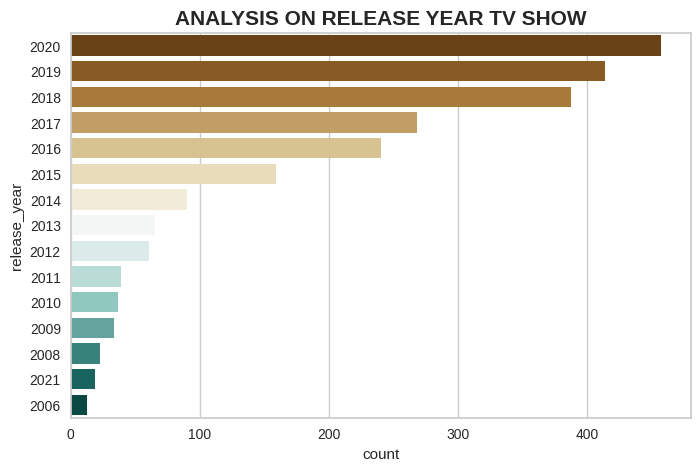

In [ ]:
#Analysis release year of tv show
plt.figure(figsize=(8,5))
sns.countplot(y="release_year", data=tv_shows, palette="BrBG", order=tv_shows['release_year'].value_counts().index[0:15])
plt.title('ANALYSIS ON RELEASE YEAR TV SHOW', fontsize=15, fontweight='bold')
plt.show()

*   **Netflix continues to add more shows on its platform over the years. Highest number of movies released in 2017 and 2018. Highest number of tv shows released in 2019  and 2020.**

*   **There is a decrease in the number of movies added in the year 2020, which might be attributed to the covid-19-induced lockdowns, which halted the creation of shows. We have Netflix data only up to 2021, hence there are less movies added in this year.**

*   **The number of movies on Netflix is growing significantly faster than the number of TV shows. It appears that Netflix has focused more attention on increasing Movie content that TV Shows. Movies have increased much more dramatically than TV shows.**

### **director**

In [ ]:
print(f'number of unique directors : {df.director.nunique()}')
print(f'null values in the column : {df.director.isna().sum()}')

number of unique directors : 4049
null values in the column : 2389


In [ ]:
print(f"Number of Movies directed by directors are : { df[df['type']=='TV Show']['director'].value_counts().sum()}")
print(f"Number of TV shows directed by directors are : {df[df['type']=='Movie']['director'].value_counts().sum()}")

Number of Movies directed by directors are : 184
Number of TV shows directed by directors are : 5214


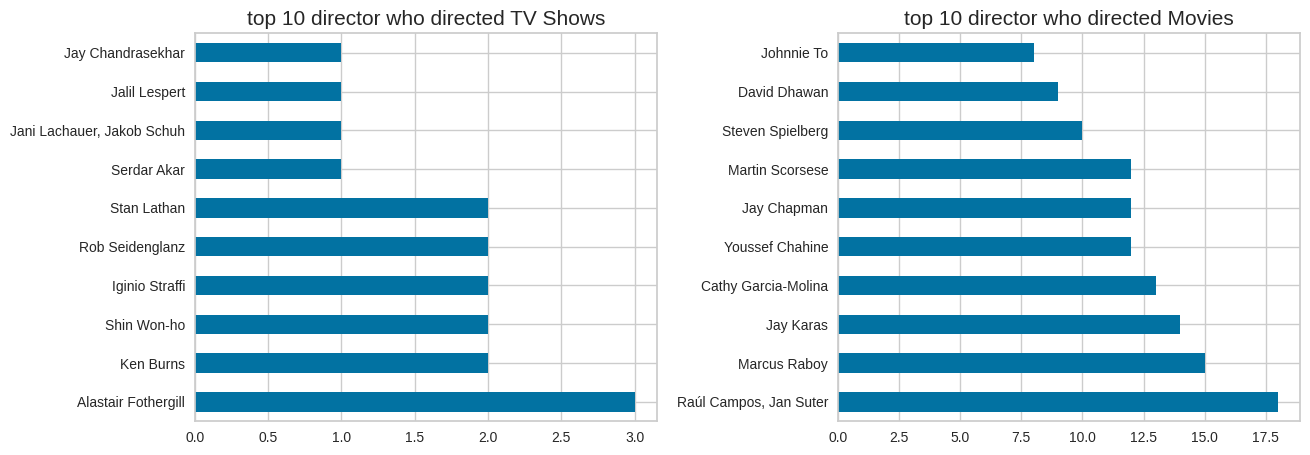

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# top 10 directors who directed TV shows
tv_shows = df[df['type']=='TV Show']['director'].value_counts()[:10].plot(kind='barh', ax=ax[0])
tv_shows.set_title('top 10 director who directed TV Shows', size=15)

# top 10 directors who directed Movies
movies = df[df['type']=='Movie']['director'].value_counts()[:10].plot(kind='barh', ax=ax[1])
movies.set_title('top 10 director who directed Movies', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

* The three shows directed by Alastair Fothergill are the highest on the data list.
* Both, Jan Suter and Raul Campos have directed 18 films, more than anyone else in the dataset.

### **cast**

In [ ]:
df['cast']

0       João Miguel, Bianca Comparato, Michel Gomes, R...
1       Demián Bichir, Héctor Bonilla, Oscar Serrano, ...
2       Tedd Chan, Stella Chung, Henley Hii, Lawrence ...
3       Elijah Wood, John C. Reilly, Jennifer Connelly...
4       Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...
                              ...                        
7782    Imad Creidi, Antoinette Turk, Elias Gergi, Car...
7783    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
7784                                              Nasty C
7785                           Adriano Zumbo, Rachel Khoo
7786                                                  NaN
Name: cast, Length: 7787, dtype: object

In [ ]:
# seperating actors from cast column
cast = df['cast'].str.split(', ', expand=True).stack()

# top actors name who play highest role in movie/show.
cast.value_counts()

Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    30
Om Puri             30
Akshay Kumar        29
                    ..
Archie Alemania      1
Demore Barnes        1
Marty Adams          1
Nicole Boivin        1
Rachel Khoo          1
Length: 32881, dtype: int64

In [ ]:
print(f"Number of TV Shows actors: {len(df[df['type']=='TV Show']['cast'].str.split(', ',expand=True).stack().value_counts())}")
print(f"Number of Movies actors: {len(df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack().value_counts())}")

Number of TV Shows actors: 13585
Number of Movies actors: 23049


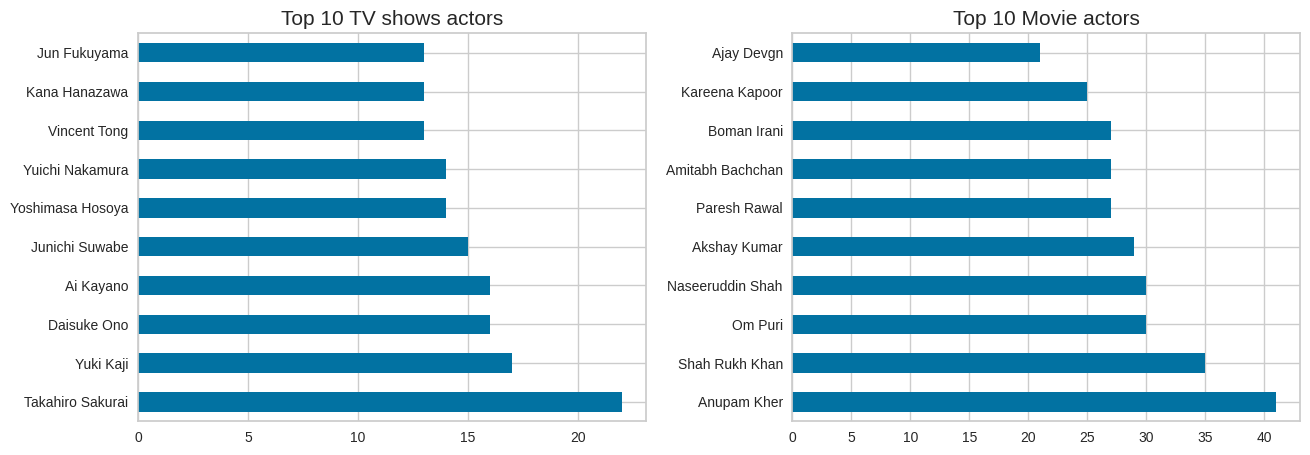

In [ ]:
fig,ax = plt.subplots(1,2, figsize=(14,5))

# seperating TV shows actor from cast column
top_TVshows_actor = df[df['type']=='TV Show']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of TV Show
a = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
a.set_title('Top 10 TV shows actors', size=15)

# seperating movie actor from cast column
top_movie_actor = df[df['type']=='Movie']['cast'].str.split(', ', expand=True).stack()
# plotting actor who appeared in highest number of Movie
b = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
b.set_title('Top 10 Movie actors', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()

* The majority of the roles in the movies are played by Anupam Kher, Shahrukh Khan, and Om Puri.
* In the shows, Takahiro Sakurai, Yuki Kaji, and Daisuke Ono played the most number of roles.

### **Release Month**

In [ ]:
# Typecasting 'date_added' from string to datetime
df["date_added"] = pd.to_datetime(df['date_added'])

# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

In [ ]:
#Value count for month column
counts = df.month_added.value_counts()
percs = df.month_added.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,12.0,10.0,1.0,11.0,3.0,9.0,8.0,4.0,7.0,5.0,6.0,2.0
count,833.000000,785.000000,757.000000,738.000000,669.000000,619.000000,618.000000,601.000000,600.000000,543.000000,542.000000,472.000000
percentage,0.107111,0.100939,0.097338,0.094895,0.086023,0.079594,0.079465,0.077279,0.077151,0.069821,0.069693,0.060692


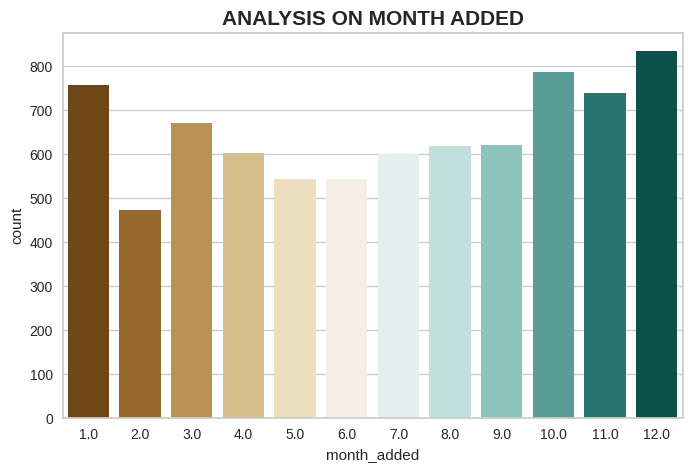

In [ ]:
#Analysis on content added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', palette="BrBG",data=df,ax=ax)
plt.title('ANALYSIS ON MONTH ADDED', fontsize=15, fontweight='bold')
plt.show()

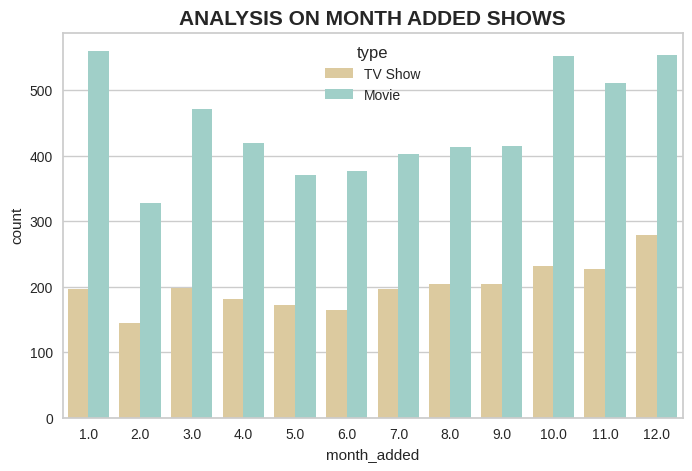

In [ ]:
#Analysis on contnet(movies/tv shows) added monthly
fig, ax = plt.subplots(figsize=(8,5))
sns.countplot(x='month_added', hue='type',palette="BrBG",data=df,ax=ax)
plt.title('ANALYSIS ON MONTH ADDED SHOWS', fontsize=15, fontweight='bold')
plt.show()

The Christmas season (October, November, December, and January) sees a greater amount of content released. Compared to TV shows, more movies are released each month.

### **Genres**

In [ ]:
#Value count for genres column
counts = df.listed_in.value_counts()
percs = df.listed_in.value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).T

,Documentaries,Stand-Up Comedy,"Dramas, International Movies","Comedies, Dramas, International Movies","Dramas, Independent Movies, International Movies",Kids' TV,Children & Family Movies,"Documentaries, International Movies","Children & Family Movies, Comedies","Comedies, International Movies",...,"Action & Adventure, International Movies, Thrillers","Anime Series, TV Horror, TV Thrillers","Anime Series, Crime TV Shows, TV Thrillers","Action & Adventure, Faith & Spirituality, Sci-Fi & Fantasy","TV Dramas, TV Sci-Fi & Fantasy, Teen TV Shows","Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows","Crime TV Shows, International TV Shows, Reality TV","International Movies, Romantic Movies, Sci-Fi & Fantasy","Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy","International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows"
count,334.000000,321.000000,320.000000,243.000000,215.00000,205.000000,177.00000,172.000000,169.000000,161.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
percentage,0.042892,0.041223,0.041094,0.031206,0.02761,0.026326,0.02273,0.022088,0.021703,0.020675,...,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128,0.000128


In [ ]:
# seperating genre from listed_in columns for analysis purpose
genres = df['listed_in'].str.split(', ', expand=True).stack()

# top 10 genres in listed movies/TV shows
genres = genres.value_counts().reset_index().rename(columns={'index':'genre', 0:'count'})
genres.head()

,genre,count
0,International Movies,2437
1,Dramas,2106
2,Comedies,1471
3,International TV Shows,1199
4,Documentaries,786


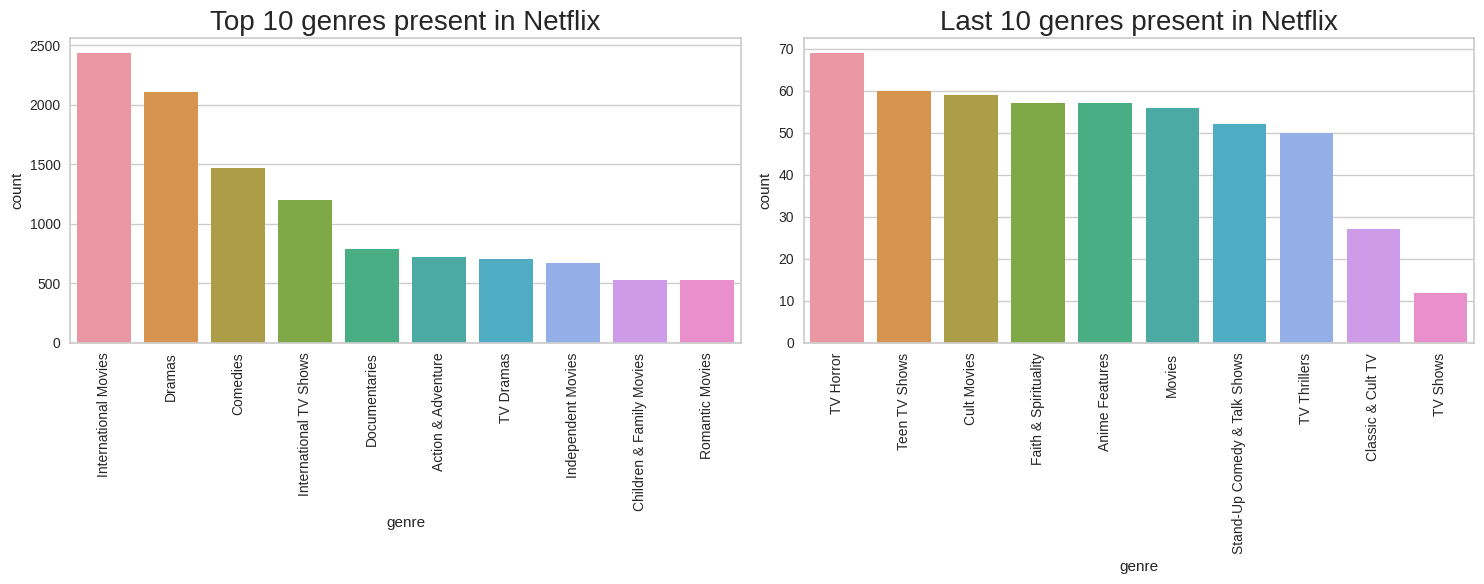

In [ ]:
# plotting graph
fig,ax = plt.subplots(1,2, figsize=(15,6))

# Top 10 genres
top = sns.barplot(x='genre', y = 'count', data=genres[:10], ax=ax[0])
top.set_title('Top 10 genres present in Netflix', size=20)
plt.setp(top.get_xticklabels(), rotation=90)

# Last 10 genres
bottom = sns.barplot(x='genre', y = 'count', data=genres[-10:], ax=ax[1])
bottom.set_title('Last 10 genres present in Netflix', size=20)
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

* International Movies, Dramas, and Comedies make up the majority of the genres.
* TV Shows, Classic and cult TV, TV thrillers, Stand-Up comedy, and Talk shows account for the least genres.

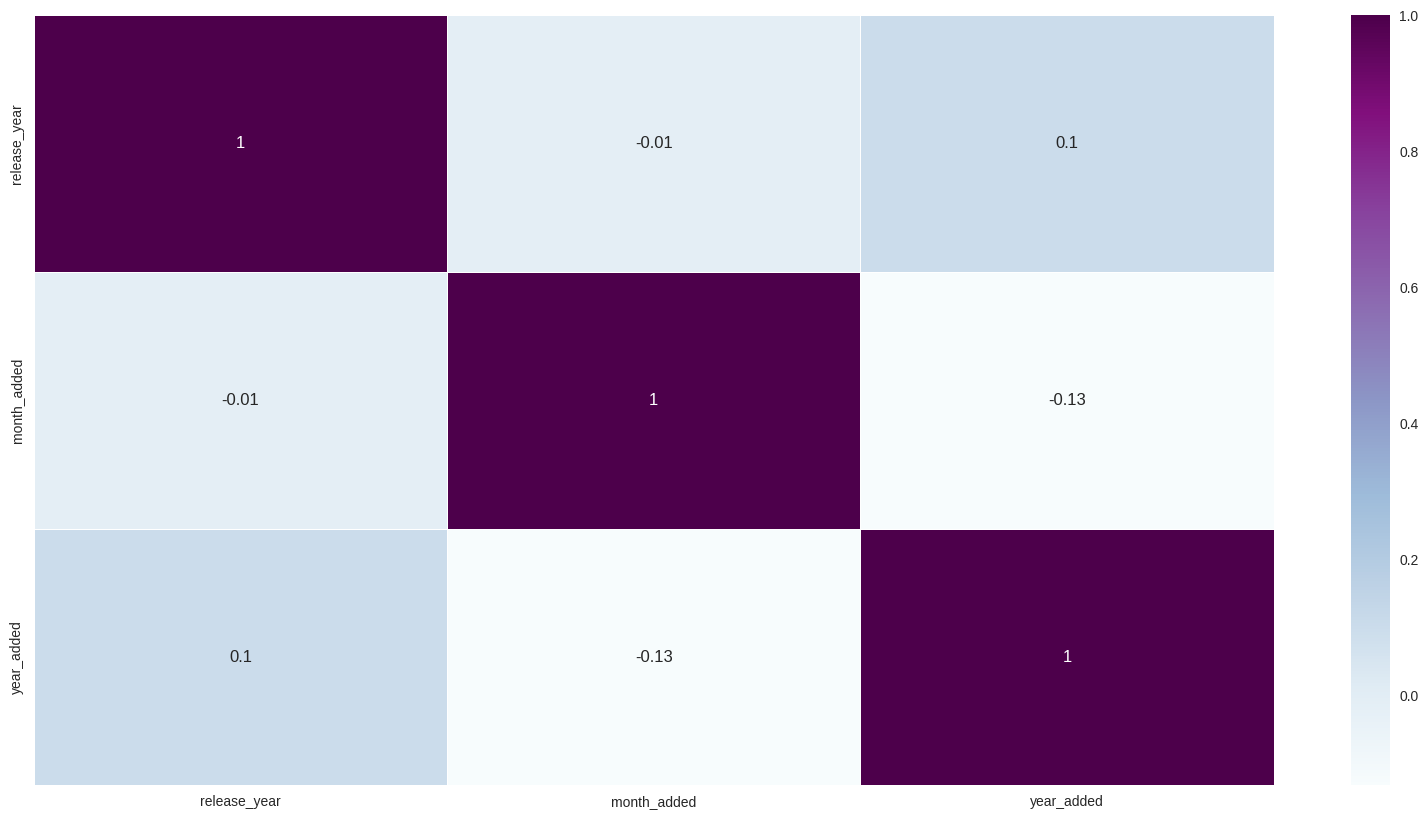

In [ ]:
# Examining the heatmap and correlation matrix to determine the relationship between the variables
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(df.corr(),ax = ax, annot=True, cmap='BuPu', linewidths=0.5)
plt.show()

- We see that the movie or TV show release year and day of the month on movies or TV shows added to Netflix are slightly correlated with each other.

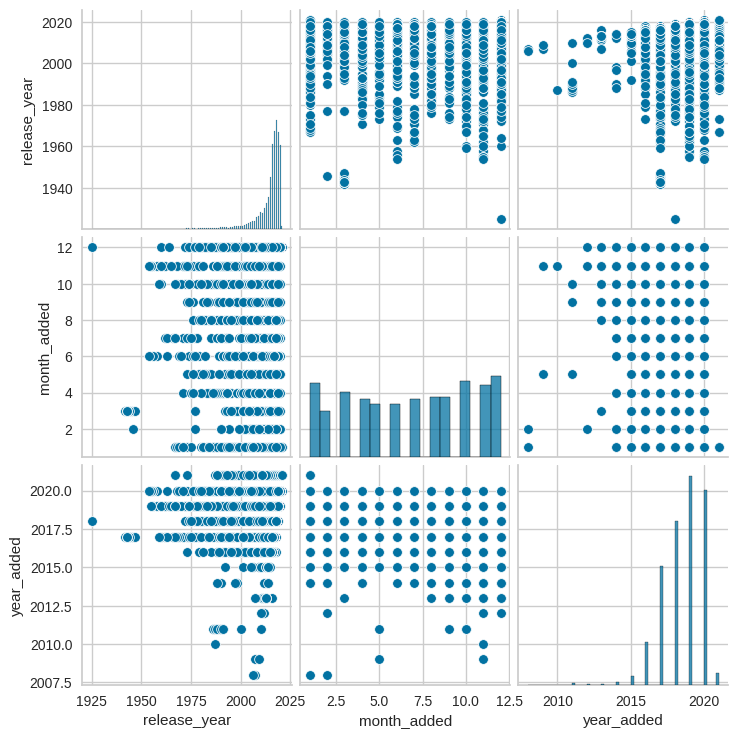

In [ ]:
# Pair Plot visualization code
sns.pairplot(df, palette="husl")
plt.show()

- Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.
- We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.